In [1]:
import pickle
import os, sys
import importlib
#import pandas as pd
#from sklearn.decomposition import PCA
# Import from parent folder
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.insert(0, parent_dir)

def unpickle_file(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    return data



In [2]:
import numpy as np
#import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.express import colors
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
#from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib import rc
#import colorsys
import matplotlib.ticker as mticker
#import plotly.express as px

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times'] + plt.rcParams['font.serif']
plt.rcParams['figure.dpi'] = 150
plt.rcParams.update({'font.size': 24})

class pca_data:
    def __init__(self, data_matrix_transformed, model_name, checkpoint_interval=1,
                  transitions=None, transition_types=None, initial_step=0,
                  transition_colors = None):
        """data_matrix_transformed is the ALREADY TRANSFORMED data matrix of shape (n, p) where n is the number of samples and p is the number of principal components."""
        self.data_matrix_transformed = data_matrix_transformed
        self.checkpoint_interval = checkpoint_interval
        self.model_name = model_name
        self.transitions=transitions
        self.transition_types=transition_types
        self.transition_colors = transition_colors
        # if transition_colors ==None:
        #     self.transition_colors = gen_transition_colors(transition_types)
        # else:
        #     self.transition_colors = transition_colors
        self.steps = np.arange(initial_step, len(data_matrix_transformed)+initial_step) * checkpoint_interval


def plot_paper_pcs_time_single_plot(pca_model_data, filename, num_comps=3, 
                                    vertlines=None,
                                    default_fontsize=12,
                                    line_color_scheme = 'viridis',
                                    xlim_right = None,):
    golden_ratio = 1.618
    fig_width = 8  # Adjust as needed
    fig_height = fig_width / golden_ratio

    fig, ax = plt.subplots(figsize=(fig_width, fig_height*0.8), facecolor='white')

    df = pca_model_data.data_matrix_transformed
    steps = pca_model_data.steps
    transitions = pca_model_data.transitions
    transition_colors = pca_model_data.transition_colors
    

    line_colors = plt.cm.get_cmap(line_color_scheme, num_comps+1)

    formatter = mticker.FuncFormatter(lambda x, pos: f'{x / 1000:.0f}')

    for comp in range(num_comps):
        color = line_colors(comp)
        sns.lineplot(x=steps, y=df[:, comp], ax=ax, label=f'PC{comp+1}', color=color)

    ax.set_xlim(left=0, right=steps[-1])
    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.set_major_locator(mticker.MaxNLocator(6))
    ax.set_xlabel('Training Steps $t$ \u00D7 $10^3$', fontsize=default_fontsize)
    ax.set_ylabel('Component Value', fontsize=default_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=default_fontsize)

    if vertlines is not None:
        for vline in vertlines:
            ax.axvline(vline, color='black', linestyle=':', linewidth=2.5)

    if transitions is not None:
        for idx, (start, end, _) in enumerate(transitions):
            color = transition_colors[idx]
            ax.axvspan(start, end, color=color, alpha=0.2)

    if xlim_right is not None:
        ax.set_xlim(right=xlim_right)

    ax.legend(loc='upper right', fontsize=default_fontsize)

    plt.tight_layout()
    fig.savefig(filename, dpi=600, bbox_inches='tight')
    return fig


In [3]:
### VERSION 5 same axis ###

LR_tuple = unpickle_file('../analysis/ed/LMinf1-behavioral-ED.pkl')
LR_pca = LR_tuple[0]
LR_pca_matrix = LR_tuple[1]
regression_transitions = [
    (0, 1000, 'R1'),
    (1000, 40000, 'R2'),
    (40000, 126000, 'R3'),
    (126000, 320000, 'R4'),
    #(120000, 320000, 'R5'),
    (320000, 500000, 'R5'),
]
regression_transition_types = ['A', 'A', 'B', 'B', 'Other']
regression_colors = [(0.9921568627450981, 0.726797385620915, 0.4915032679738562),
 (0.9137254901960784, 0.3686274509803921, 0.050980392156862744),
 (0.42274509803921567, 0.684075355632449, 0.8398923490965013),
 (0.0, 0.3458576429404901, 0.6392941176470589),
 (0.5906343713956171, 0.5906343713956171, 0.5906343713956171)]

regression_pca_data = pca_data(LR_pca_matrix, 
                                       checkpoint_interval=100, 
                                       model_name='Regression (Behavioral)',
                                       transitions = regression_transitions,
                                       transition_types = regression_transition_types,
                                       transition_colors=regression_colors,
                                       initial_step=1,
                                       )


language_pca_matrix = unpickle_file('../analysis/ed/ED-LM-samples-2layer-5k.pkl')
language_transitions = [(0,900, 'L1'), 
                        (900,6500, 'L2'), 
                        (6500,8500,'L3'),
                        (8500, 17000, 'L4'),
                        (17000, 50000, 'L5')]
language_transition_types = ['A', 'A', 'B', 'A', 'Other']
language_colors = [(0.992249134948097, 0.8177162629757785, 0.639354094579008),
(0.9921568627450981, 0.5549711649365628, 0.2381853133410227),
(0.42274509803921567, 0.684075355632449, 0.8398923490965013),
(0.8517185697808535, 0.28336793540945787, 0.00447520184544406),
(0.5906343713956171, 0.5906343713956171, 0.5906343713956171)] # must be same length as transition_types

# 
language_pca_data = pca_data(language_pca_matrix, 
                                       checkpoint_interval=10, 
                                       model_name='Language (Behavioral)',
                                       transitions = language_transitions,
                                       transition_types = language_transition_types,
                                       transition_colors=language_colors,)




<ipython-input-2-a59f0c289936>:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  line_colors = plt.cm.get_cmap(line_color_scheme, num_comps+1)


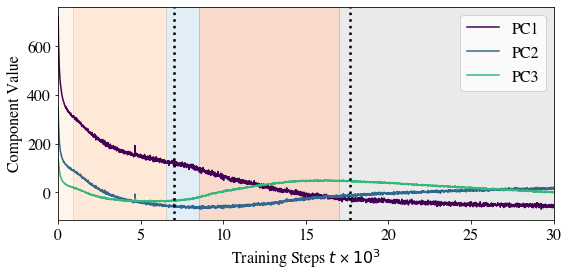

In [4]:
fig = plot_paper_pcs_time_single_plot(language_pca_data, '../figures/ed/pcs_time_single_plot_lm.pdf', num_comps=3, 
                                    vertlines=[7000, 17700],
                                    default_fontsize=16,
                                    line_color_scheme = 'viridis',
                                    xlim_right = 30_000)

<ipython-input-2-a59f0c289936>:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  line_colors = plt.cm.get_cmap(line_color_scheme, num_comps+1)


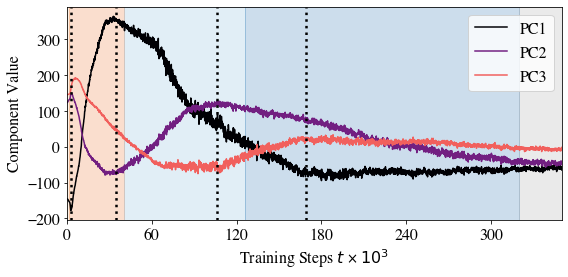

In [5]:
fig = plot_paper_pcs_time_single_plot(regression_pca_data, '../figures/ed/pcs_time_single_plot_lr.pdf', num_comps=3, 
                                    vertlines=[2500, 34500, 106100, 168900],
                                    default_fontsize=16,
                                    line_color_scheme = 'magma',
                                    xlim_right = 350_000)